<a href="https://colab.research.google.com/github/kuchsk/skillfactory/blob/main/skillfactory8x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Вопрос по заданию 8.4 в ответе 8, у меня в ответе 4.
# Посмотрите пожалуйста, вот вся последовательность

In [8]:
import pandas as pd
import numpy as np
di = pd.read_csv('https://raw.githubusercontent.com/kuchsk/PY/main/diabetes_data.csv')

In [9]:
# Задание 8.1 Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их.
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?
didr = di.drop_duplicates()
didr.shape

(768, 10)

In [10]:
# Задание 8.2 Далее найдите все неинформативные признаки в данных и избавьтесь от них.
# В качестве порога информативности возьмите 0.95:
# удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны.
# В ответ запишите имена признаков, которые вы нашли (без кавычек).
print(f'Сначала ответ, потом удаление, а то неудобно получается: \
{[col for col in didr.columns if didr[col].value_counts(normalize=True).max() > 0.95 or didr[col].nunique() / didr[col].count() > 0.95]}')

didr = didr[[col for col in didr.columns if (didr[col].value_counts().max() / len(didr) < 0.95) and (didr[col].nunique() / len(didr) < 0.95)]]

Сначала ответ, потом удаление, а то неудобно получается: ['Gender']


In [11]:
# Задание 8.3 Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin на символ пропуска.
# Его вы можете взять из библиотеки numpy: np.nan.
# Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.
didr = didr[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].apply(lambda x: x.replace(0, np.nan))            #!!!!!!!!!!!!!!!
display(didr['Insulin'].isnull().mean().round(2))
# display(round((len(list(i for i in list(didr.Insulin) if i<1)) / len(list(didr.Insulin))), 2))

0.49

In [14]:
# Задание 8.4 # Удалите из данных признаки, где число пропусков составляет более 30 %.
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
didr.dropna(thresh=(didr.shape[0]*0.3), axis=1).shape[1]

5

In [57]:
# Задание 8.5 # Удалите из данных только те строки, в которых содержится более двух пропусков одновременно.
# Чему равно результирующее число записей в таблице?
didr.dropna(thresh = didr.shape[1]-3, axis = 0).shape[0]

761

In [55]:
# альтернатива
didr[didr.count(axis=1) >= 2].shape[0]

761

In [65]:
# В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.
didr.fillna(didr.median())
didr.SkinThickness.mean().round(1)
# В эталонном ответе 29,1

29.2

In [84]:
# Задание 8.7
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
# Примечание: дальнейшая работа производится с очищенными от дубликатов, неинформативных признаков данных и пропусков.

len(didr[(didr.SkinThickness > (didr.SkinThickness.quantile(0.75) + 1.5 * (didr.SkinThickness.quantile(0.75) - didr.SkinThickness.quantile(0.25))))
     | (didr.SkinThickness < (didr.SkinThickness.quantile(0.25) - 1.5 * (didr.SkinThickness.quantile(0.75) - didr.SkinThickness.quantile(0.25))))])

87

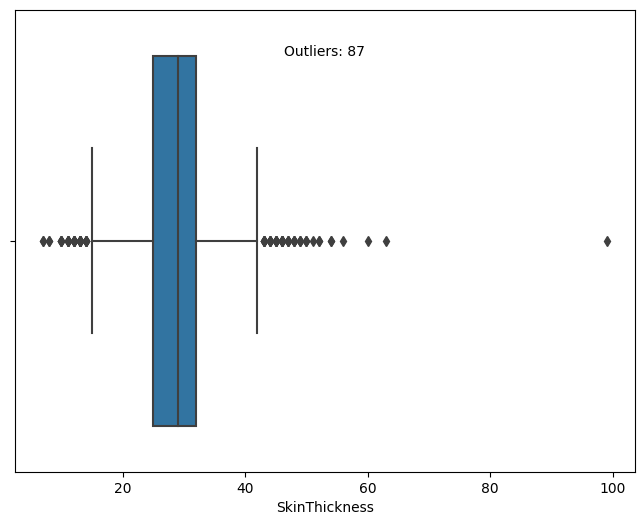

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=didr.SkinThickness)

plt.annotate(f"Outliers: {len(didr[(didr.SkinThickness > (didr.SkinThickness.quantile(0.75) + 1.5 * (didr.SkinThickness.quantile(0.75) - didr.SkinThickness.quantile(0.25)))) | (didr.SkinThickness < (didr.SkinThickness.quantile(0.25) - 1.5 * (didr.SkinThickness.quantile(0.75) - didr.SkinThickness.quantile(0.25))))])}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
plt.show()

In [90]:
# Задание 8.8
# Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

import numpy as np
z_scores = (didr.SkinThickness - np.mean(didr.SkinThickness)) / np.std(didr.SkinThickness)
sum(np.abs(z_scores) > 3)

4

In [21]:
# Задание 8.9
# Найдите число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
# найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!).
# Какова разница между двумя этими числами (вычтите из первого второе)?

# !!!!!! прыгать по кускам датафрейма моветон, особенно учитывая примечание 8,7. DiabetesPedigreeFunction пропал еще в 8.2
d = didr.DiabetesPedigreeFunction
len(didr[(d > (d.quantile(0.75) + 1.5 * (d.quantile(0.75) - d.quantile(0.25))))
       | (d < (d.quantile(0.25) - 1.5 * (d.quantile(0.75) - d.quantile(0.25))))])

29

In [22]:
# Доп задание
import numpy as np

log_feature = np.log(didr.DiabetesPedigreeFunction)

# Подсчитываем количество выбросов
outliers = sum(~np.isnan(log_feature) & ((log_feature - np.mean(log_feature)) / np.std(log_feature) < -3))

print(f"Количество выбросов в признаке после логарифмирования: {outliers}")

Количество выбросов в признаке после логарифмирования: 0
